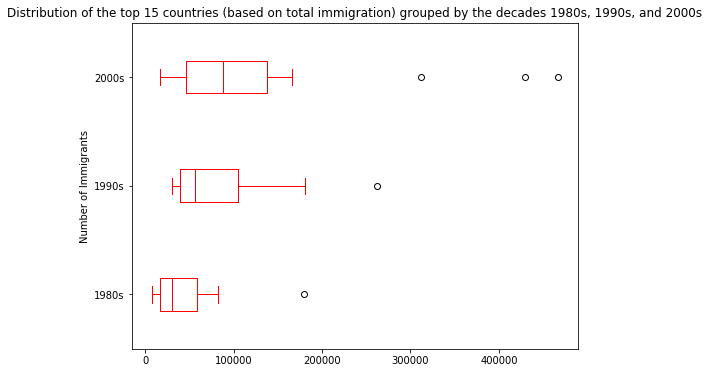

In [1]:
#Distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

df_top15 = df_can.sort_values(['Total'],ascending=False,axis=0).head(15)

# create a list of all years in decades 80's, 90's, and 00's
decade80 = list(map(str,range(1980,1990)))
decade90 = list(map(str,range(1990,2000)))
decade00 = list(map(str,range(2000,2014)))

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:,decade80].sum(axis=1)
df_90s = df_top15.loc[:,decade90].sum(axis=1)
df_00s = df_top15.loc[:,decade00].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s':df_80s,'1990s':df_90s,'2000s':df_00s})

### type your answer here

new_df.plot(kind="box" , figsize=(8,6), color="red",vert=False)

plt.title("Distribution of the top 15 countries grouped by the decades 1980s, 1990s, and 2000s")
plt.ylabel("Number of Immigrants")
plt.show()

